In [1]:
from rubin_scheduler.site_models import _read_fields, read_fields
import numpy as np
import healpy as hp
%matplotlib inline
from rubin_scheduler.scheduler.utils import ObservationArray, HpInLsstFov
from rubin_scheduler.scheduler.features import NObservations
from rubin_scheduler.scheduler.utils import HpInLsstFov
from rubin_sim import maf
import matplotlib.pylab as plt

from rubin_scheduler.scheduler.surveys import BaseMarkovSurvey
from rubin_scheduler.utils import hpid2_ra_dec

In [2]:
ra,dec = read_fields()

In [3]:
obs = ObservationArray(n=ra.size)

In [4]:
obs['RA'] = ra
obs['dec'] = dec


names = ['fieldRA', 'fieldDec', 'night', 'rotSkyPos']
types = [float, float, int, float]
data = np.zeros(obs.size, dtype=list(zip(names,types)))

data['fieldRA'] = obs['RA']
data['fieldDec'] = obs['dec']



In [5]:
hp.nside2npix(128)

196608

In [6]:
nside=1028
survey = BaseMarkovSurvey([],[], nside=nside)

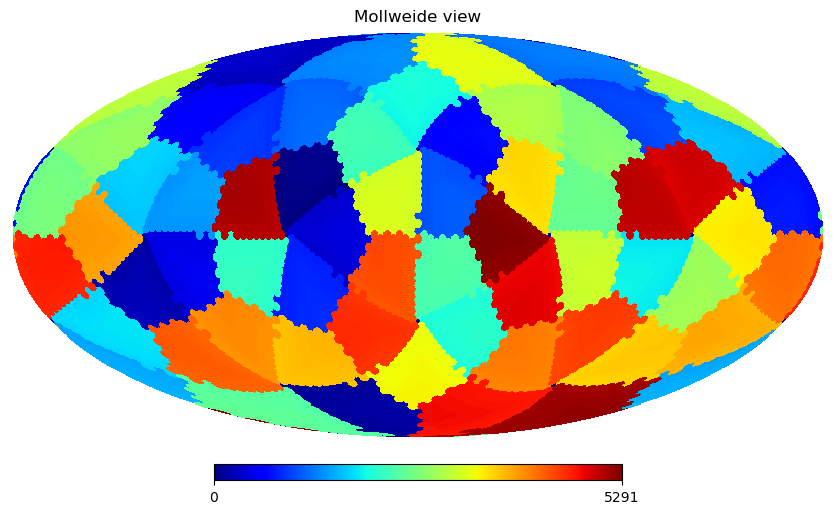

In [7]:
hp.mollview(survey.hp2fields, cmap="jet")

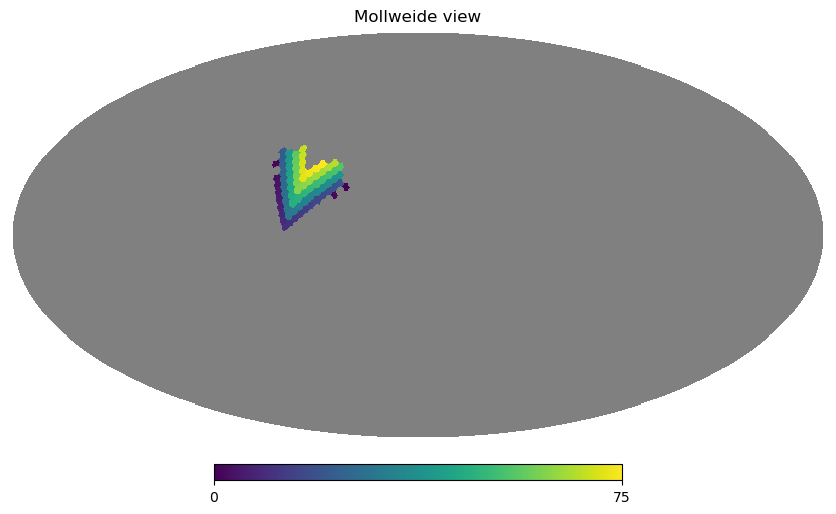

In [8]:
tm = np.where(survey.hp2fields > 75)
mapping = survey.hp2fields + 0.
mapping[tm] = np.nan
hp.mollview(mapping)

In [9]:
class Dummy(object):
    def __init__(self):
        self.night = 0

cond = Dummy()
cond.night = 5
    

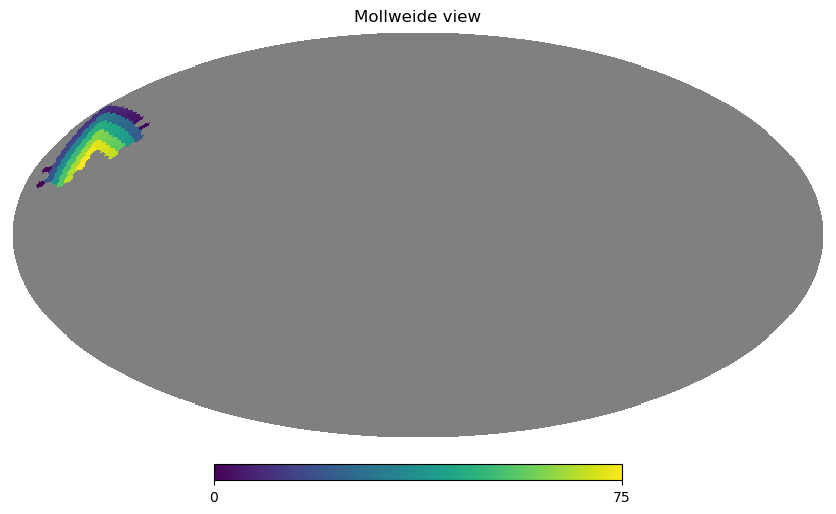

In [10]:
survey._spin_fields(cond)
tm = np.where(survey.hp2fields > 75)
mapping = survey.hp2fields + 0.
mapping[tm] = np.nan
hp.mollview(mapping)

In [11]:
# ok, that is hard to understand. Maybe let's try selecting a region and showing how it gets tesselated each night?
hra,hdec = hpid2_ra_dec(nside, np.arange(hp.nside2npix(nside)))

In [ ]:
for night in [1,5]:

    cond.night = night
    survey._spin_fields(cond)
    
    good = np.where(hdec < -60)[0]
    
    vals = hdec * 0. +np.nan
    vals[good] = survey.hp2fields[good]
    vals_remap = vals +0.
    for i,ack in enumerate(np.unique(vals[good])):
        indx = np.where(vals == ack)
        vals_remap[indx] = i
                         
    hp.gnomview(vals_remap, rot=(0,-90,0), reso=20, title="Night %i" % night, unit="HealPix to Pointing", notext=True)
    plt.savefig("hp2p_n%i.pdf" % night)
    
    # loop over each pointing and add it to a feature
    feat = NObservations(nside=nside)
    
    obs = ObservationArray(n=1)
    pointing2hpindx = HpInLsstFov(nside=nside)
    
    for val in np.unique(vals[good]):
        obs["RA"] = survey.fields[int(val)]["RA"]
        obs["dec"] = survey.fields[int(val)]["dec"]
        indx =     pointing2hpindx(obs["RA"], obs["dec"])
        feat.add_observation(obs, indx=indx)
    ack = feat.feature + 0
    ack[np.where(ack == 0)] = np.nan
    hp.gnomview(ack, rot=(0,-90,0), reso=20, title="Night %i" %i, unit="N Overlaps", notext=True)
    plt.savefig("nover_n%i.pdf" % night)
